In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

arquivo = 'imd_notas.xlsx'
excel = pd.ExcelFile(arquivo)
print(excel.sheet_names)
dados = excel.parse(0)



['Notas']


In [98]:
#1)
#A

sum_total_reprovacoes=0
sum_total_aprovacoes=0

for j in dados['disciplina_ID'].unique(): #disciplinas
    dados_disc = dados.loc[(dados['disciplina_ID'] == j)]
    dados_apro = dados_disc.loc[(dados['status.disciplina'] == 'Aprovado')] #lista de aprovados    
    dados_apro_repr = dados_disc.merge(dados_apro, left_on='a_ID', right_on='a_ID', how='outer')    
    
    total_reprovacoes = len(dados_apro_repr.loc[(dados_apro_repr["status.disciplina_x"]=="Reprovado") & (dados_apro_repr["status.disciplina_y"]=="Aprovado")])
    total_aprovacoes = len(dados_apro_repr.loc[(dados_apro_repr["status.disciplina_x"]=="Aprovado")]["a_ID"])
    
    sum_total_reprovacoes = sum_total_reprovacoes+total_reprovacoes
    sum_total_aprovacoes = sum_total_aprovacoes+total_aprovacoes
    
    print("Disciplina id ", j, " = ", (total_reprovacoes+total_aprovacoes)/total_aprovacoes)
    
#B
print("\n\nGeral = ", (sum_total_reprovacoes+sum_total_aprovacoes)/sum_total_aprovacoes )

Disciplina id  0  =  1.2655826558265582
Disciplina id  1  =  1.0269058295964126
Disciplina id  2  =  1.1267605633802817
Disciplina id  3  =  1.3333333333333333
Disciplina id  4  =  1.0313111545988258
Disciplina id  5  =  1.3549618320610688
Disciplina id  6  =  1.0889679715302492


Geral =  1.136623748211731


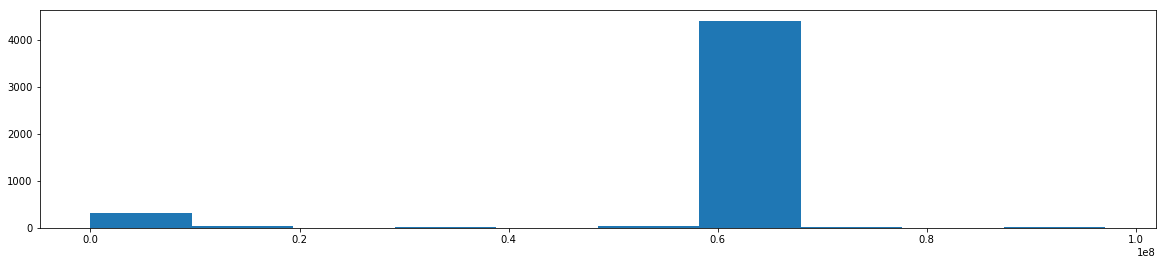

In [110]:
#2

fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(dados['CEP'], range=(0,9999999))
ax1.hist(dados['nota'], range=(0,10))

plt.show()

#print(dados.groupby(['CEP', 'status.disciplina'])['status.disciplina'].value_counts())


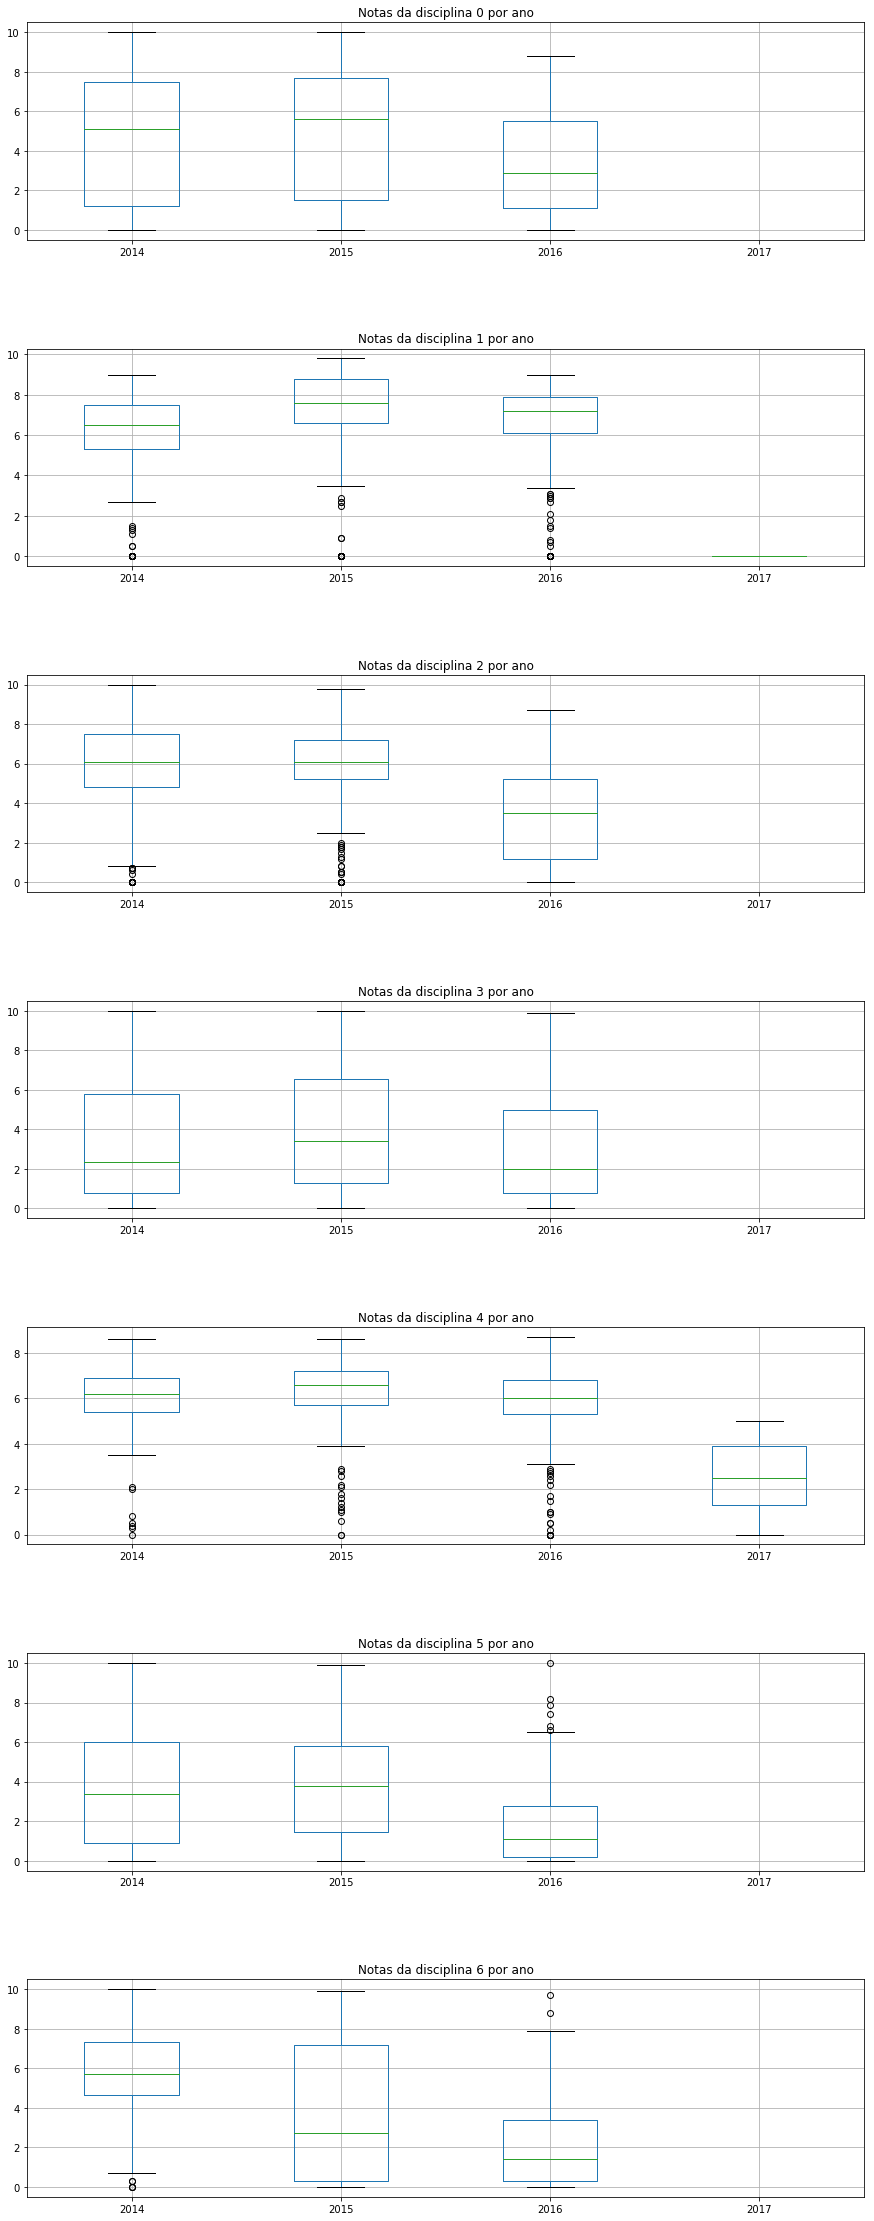

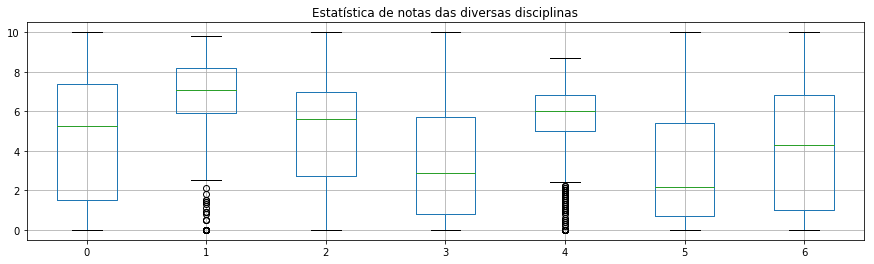

In [122]:
#3

#a
list_ano = dados['ano_disciplina'].unique()
list_disciplinas = dados['disciplina_ID'].unique()
fig3a, axes3a = plt.subplots(nrows=len(list_disciplinas), ncols=1, figsize=(15,40))
dados3a = pd.DataFrame()
count1 = 0

for disc in list_disciplinas:
    dados3a.drop(dados3a.index, inplace=True)
    axes3a[count1].title.set_text('Notas da disciplina '+str(disc)+' por ano')
    
    for ano in list_ano:
        dados3a[ano] = pd.Series(dados.loc[(dados['disciplina_ID']==disc) & (dados['ano_disciplina']==ano)]['nota'].tolist())

    dados3a.boxplot(ax=axes3a[count1])    
    count1 = count1+1
    
fig3a.subplots_adjust(hspace=.5)


#b
fig3b = plt.figure(figsize=(15,4))
df = pd.DataFrame()

for disc in list_disciplinas:
    df[disc]=pd.Series(dados.loc[dados['disciplina_ID'] == disc]['nota'].tolist())

df.boxplot()
plt.title('Estatística de notas das diversas disciplinas')
plt.show()



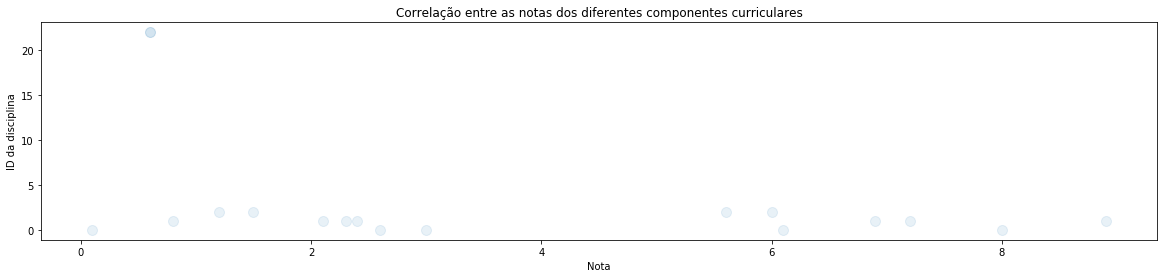

In [126]:
#4
fig2 = plt.figure(figsize=(20,4))
plt.title('Correlação entre as notas dos diferentes componentes curriculares')
plt.xlabel('Nota')
plt.ylabel('ID da disciplina')
X = dados['nota']
Y = dados['disciplina_ID']
plt.scatter(X,Y, alpha=0.1, s=100)

plt.show()


In [359]:
#5

fig5 = plt.figure(figsize=(20,4))

#dados["num_d"] = dados.loc[dados['ano_disciplina'] == 2015]['nota']

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

#df = pd.DataFrame({'0':dados.loc[dados['disciplina_ID'] == 0]['nota'], })
#dados2 = dados.loc[dados['disciplina_ID'] == 0]['nota']

#print(dados.groupby(['a_ID', 'ano_disciplina'])['periodo_disciplina'].value_counts().head())

#print(dadosdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABI4AAAEJCAYAAADy5mxeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAE9VJREFUeJzt3X+s3fV93/HXO3ZG2DIaMiwL2XRGlfvDsJEMj7C10rKwCSep6lRaI2dbQRUKqqBVJk3qTFUt2yok+kenCq0wsQxhuimWt0bFbUIbRJOlU0OpWdNQwxhWCMEuwU6yjv6QmAzv/XG/yU6dj3vPxZdzj+HxkI7u93y+3+85n/vHR9c8+Z7vqe4OAAAAAJzpTRs9AQAAAACWk3AEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMDQ5o2ewGouueSS3rFjx0ZPAwAAAOB147HHHvtad29Z7bilD0c7duzIkSNHNnoaAAAAAK8bVfXsPMf5qBoAAAAAQ8IRAAAAAEPCEQAAAABDwhEAAAAAQ8IRAAAAAEPCEQAAAABDwhEAAAAAQ8IRAAAAAEPCEQAAAABDmzd6AgAA8FrZsf+TGz0FBr58x/s3egoAzMkVRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADM0djqpqU1X9XlX92vT87VX1UFU9Pf28eObY26rqWFU9VVXXz4xfXVWPT/vurKpa318HAAAAgPWyliuOPpLkyZnn+5M83N07kzw8PU9V7UqyL8kVSfYkuauqNk3n3J3kw0l2To895zR7AAAAAF4zc4Wjqtqe5P1JPjYzvDfJgWn7QJIPzIwf7O6XuvuZJMeSXFNVlya5qLsf6e5Ocv/MOQAAAAAsmXmvOPqFJD+V5JWZsa3d/fy0/dUkW6ftbUmemznu+DS2bdo+cxwAAACAJbRqOKqqH0xysrsfO9sx0xVEvV6Tqqqbq+pIVR05derUer0sAAAAAGswzxVH35/kh6rqy0kOJnlPVf2nJC9MHz/L9PPkdPyJJJfNnL99GjsxbZ85/m26+57u3t3du7ds2bKGXwcAAACA9bJqOOru27p7e3fvyMpNr3+zu/9pksNJbpwOuzHJA9P24ST7quqCqro8KzfBfnT6WNuLVXXt9G1qN8ycAwAAAMCS2XwO596R5FBV3ZTk2SQfTJLuPlpVh5I8keR0klu7++XpnFuS3JfkwiQPTg8AAAAAltCawlF3fzbJZ6ftrye57izH3Z7k9sH4kSRXrnWSAAAAACzevN+qBgAAAMAbjHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwNCq4aiq3lJVj1bV71fV0ar619P426vqoap6evp58cw5t1XVsap6qqqunxm/uqoen/bdWVX12vxaAAAAAJyrea44einJe7r7qiTvSLKnqq5Nsj/Jw929M8nD0/NU1a4k+5JckWRPkruqatP0Wncn+XCSndNjzzr+LgAAAACso1XDUa/4k+npm6dHJ9mb5MA0fiDJB6btvUkOdvdL3f1MkmNJrqmqS5Nc1N2PdHcnuX/mHAAAAACWzFz3OKqqTVX1hSQnkzzU3b+TZGt3Pz8d8tUkW6ftbUmemzn9+DS2bdo+cxwAAACAJTRXOOrul7v7HUm2Z+XqoSvP2N9ZuQppXVTVzVV1pKqOnDp1ar1eFgAAAIA1WNO3qnX3HyX5TFbuTfTC9PGzTD9PToedSHLZzGnbp7ET0/aZ46P3uae7d3f37i1btqxligAAAACsk3m+VW1LVb1t2r4wyT9M8j+THE5y43TYjUkemLYPJ9lXVRdU1eVZuQn2o9PH2l6sqmunb1O7YeYcAAAAAJbM5jmOuTTJgemb0d6U5FB3/1pVfT7Joaq6KcmzST6YJN19tKoOJXkiyekkt3b3y9Nr3ZLkviQXJnlwegAAAACwhFYNR939xSTvHIx/Pcl1Zznn9iS3D8aPJLny288AAAAAYNms6R5HAAAAALxxCEcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADK0ajqrqsqr6TFU9UVVHq+oj0/jbq+qhqnp6+nnxzDm3VdWxqnqqqq6fGb+6qh6f9t1ZVfXa/FoAAAAAnKt5rjg6neSfd/euJNcmubWqdiXZn+Th7t6Z5OHpeaZ9+5JckWRPkruqatP0Wncn+XCSndNjzzr+LgAAAACso1XDUXc/393/Y9r+4yRPJtmWZG+SA9NhB5J8YNrem+Rgd7/U3c8kOZbkmqq6NMlF3f1Id3eS+2fOAQAAAGDJrOkeR1W1I8k7k/xOkq3d/fy066tJtk7b25I8N3Pa8Wls27R95jgAAAAAS2jucFRVb03yy0n+WXe/OLtvuoKo12tSVXVzVR2pqiOnTp1ar5cFAAAAYA3mCkdV9easRKP/3N2fmIZfmD5+lunnyWn8RJLLZk7fPo2dmLbPHP823X1Pd+/u7t1btmyZ93cBAAAAYB3N861qleQ/Jnmyu//tzK7DSW6ctm9M8sDM+L6quqCqLs/KTbAfnT7W9mJVXTu95g0z5wAAAACwZDbPccz3J/nRJI9X1RemsZ9OckeSQ1V1U5Jnk3wwSbr7aFUdSvJEVr6R7dbufnk675Yk9yW5MMmD0wMAAACAJbRqOOru/56kzrL7urOcc3uS2wfjR5JcuZYJAgAAALAx1vStagAAAAC8cQhHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAwJRwAAAAAMCUcAAAAADAlHAAAAAAytGo6q6t6qOllVfzAz9vaqeqiqnp5+Xjyz77aqOlZVT1XV9TPjV1fV49O+O6uq1v/XAQAAAGC9zHPF0X1J9pwxtj/Jw929M8nD0/NU1a4k+5JcMZ1zV1Vtms65O8mHk+ycHme+JgAAAABLZNVw1N2fS/KNM4b3JjkwbR9I8oGZ8YPd/VJ3P5PkWJJrqurSJBd19yPd3UnunzkHAAAAgCX0au9xtLW7n5+2v5pk67S9LclzM8cdn8a2TdtnjgMAAACwpM755tjTFUS9DnP5lqq6uaqOVNWRU6dOredLAwAAADCnVxuOXpg+fpbp58lp/ESSy2aO2z6NnZi2zxwf6u57unt3d+/esmXLq5wiAAAAAOfi1Yajw0lunLZvTPLAzPi+qrqgqi7Pyk2wH50+1vZiVV07fZvaDTPnAAAAALCENq92QFV9PMm7k1xSVceTfDTJHUkOVdVNSZ5N8sEk6e6jVXUoyRNJTie5tbtfnl7qlqx8Q9uFSR6cHgAAAAAsqVXDUXd/6Cy7rjvL8bcnuX0wfiTJlWuaHQAAAAAb5pxvjg0AAADA65NwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADAkHAEAAAAwJBwBAAAAMCQcAQAAADA0OaNnsAbxY79n9zoKTDw5Tvev9FTAAAAgKXliiMAAAAAhoQjAAAAAIaEIwAAAACGhCMAAAAAhoQjAAAAAIaEIwAAAACGhCMAAAAAhoQjAAAAAIaEIwAAAACGhCMAAAAAhhYejqpqT1U9VVXHqmr/ot8fAAAAgPksNBxV1aYkv5jkvUl2JflQVe1a5BwAAAAAmM/mBb/fNUmOdfeXkqSqDibZm+SJBc8DkiQ79n9yo6fAGb58x/s3egoAr5q/KwDA682iw9G2JM/NPD+e5F0LngMAa+Q/hpePyAqcz/xdWT7+riwna2X5vBHXyqLD0Vyq6uYkN09P/6SqntrI+ayTS5J8baMnAcuufu4v3G0dwWSVtXI21hCcG2uI161X+XdlrawhznsLWitns95r6K/Pc9Ciw9GJJJfNPN8+jf053X1PknsWNalFqKoj3b17o+cB5zPrCM6NNQTnxhqCc2MNwbnZqDW06G9V+90kO6vq8qr6S0n2JTm84DkAAAAAMIeFXnHU3aer6ieS/EaSTUnu7e6ji5wDAAAAAPNZ+D2OuvtTST616PddAq+rj97BBrGO4NxYQ3BurCE4N9YQnJsNWUPV3RvxvgAAAAAsuUXf4wgAAACA84RwtM6qak9VPVVVx6pq/2B/VdWd0/4vVtXf2oh5wrKaYw39k2ntPF5Vv11VV23EPGFZrbaGZo7721V1uqr+0SLnB8tunjVUVe+uqi9U1dGq+m+LniMsszn+LfcdVfWrVfX70xr6sY2YJyyrqrq3qk5W1R+cZf/Cm4JwtI6qalOSX0zy3iS7knyoqnadcdh7k+ycHjcnuXuhk4QlNucaeibJ3+vuv5HkZ+Oz8vAtc66hbx73c0k+vdgZwnKbZw1V1duS3JXkh7r7iiQ/svCJwpKa8+/QrUme6O6rkrw7yc9P37gNrLgvyZ6/YP/Cm4JwtL6uSXKsu7/U3f83ycEke884Zm+S+3vFI0neVlWXLnqisKRWXUPd/dvd/b+np48k2b7gOcIym+fvUJL8ZJJfTnJykZOD88A8a+gfJ/lEd38lSbrbOoL/b5411En+alVVkrcm+UaS04udJiyv7v5cVtbF2Sy8KQhH62tbkudmnh+fxtZ6DLxRrXV93JTkwdd0RnB+WXUNVdW2JD8cV7zCyDx/h747ycVV9dmqeqyqbljY7GD5zbOG/l2S70vyh0keT/KR7n5lMdOD14WFN4XNr+WLA7xWqurvZyUc/cBGzwXOM7+Q5F909ysr/7MXWKPNSa5Ocl2SC5N8vqoe6e7/tbHTgvPG9Um+kOQ9Sb4ryUNV9Vvd/eLGTgs4G+FofZ1IctnM8+3T2FqPgTequdZHVf3NJB9L8t7u/vqC5gbng3nW0O4kB6dodEmS91XV6e7+lcVMEZbaPGvoeJKvd/efJvnTqvpckquSCEcw3xr6sSR3dHcnOVZVzyT53iSPLmaKcN5beFPwUbX19btJdlbV5dMN3vYlOXzGMYeT3DDdCf3aJP+nu59f9ERhSa26hqrqO5N8IsmP+r+78G1WXUPdfXl37+juHUn+a5JbRCP4lnn+LfdAkh+oqs1V9ZeTvCvJkwueJyyredbQV7JyxV6qamuS70nypYXOEs5vC28KrjhaR919uqp+IslvJNmU5N7uPlpVPz7t//dJPpXkfUmOJfmzrBR3IHOvoX+Z5K8luWu6YuJ0d+/eqDnDMplzDQFnMc8a6u4nq+rXk3wxyStJPtbdw69MhjeaOf8O/WyS+6rq8SSVlY9Pf23DJg1Lpqo+npVvHLykqo4n+WiSNycb1xRq5QpBAAAAAPjzfFQNAAAAgCHhCAAAAIAh4QgAAACAIeEIAAAAgCHhCAAAAOA8UVX3VtXJqlr1Wz2r6jur6jNV9XtV9cWqet9a3084AgAAADh/3Jdkz5zH/kySQ939ziT7kty11jcTjgAAAADOE939uSTfmB2rqu+qql+vqseq6req6nu/eXiSi6bt70jyh2t9v83nNFsAAAAANto9SX68u5+uqndl5cqi9yT5V0k+XVU/meSvJPkHa31h4QgAAADgPFVVb03yd5P8l6r65vAF088PJbmvu3++qv5Okl+qqiu7+5V5X184AgAAADh/vSnJH3X3Owb7bsp0P6Tu/nxVvSXJJUlOruXFAQAAADgPdfeLSZ6pqh9Jklpx1bT7K0mum8a/L8lbkpxay+tXd6/jdAEAAAB4rVTVx5O8OytXDr2Q5KNJfjPJ3UkuTfLmJAe7+99U1a4k/yHJW7Nyo+yf6u5Pr+n9hCMAAAAARnxUDQAAAIAh4QgAAACAIeEIAAAAgCHhCAAAAIAh4QgAAACAIeEIAAAAgCHhCAAAAIAh4QgAAACAof8HnDZ9iMO8s3oAAAAASUVORK5CYII=.groupby(['a_ID', 'ano_disciplina', 'periodo_disciplina']))

#print(dados.pivot_table(index=["a_ID", 'ano_disciplina'], values="periodo_disciplina", aggfunc=np.mean).head())

#for aluno in dados.groupby(['a_ID']):
 #   print(aluno["ano_disciplina"])

#print(dados.groupby(['CEP', 'status.disciplina'])['status.disciplina'].value_counts())

#Y = dados.groupby(['a_ID', 'ano_disciplina'])['periodo_disciplina'].value_counts()
#X = dados.groupby(['a_ID', 'ano_disciplina', 'periodo_disciplina'])['nota'].mean()
#plt.scatter(X,Y, alpha=0.1, s=100)

#plt.title("Relação entre o número médio de disciplinas cursadas por aluno e o seu desempenho")
#plt.xlabel("Número de disciplinas")
#plt.ylabel("Nota média do aluno")

#plt.show()



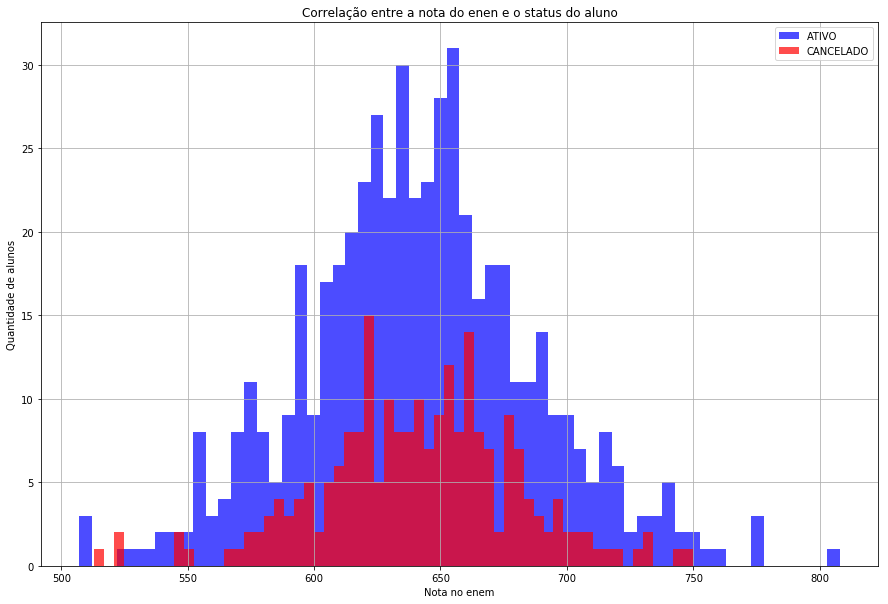

In [135]:
#6

fig6 = plt.figure(figsize=(15,10))

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

ativo = dados.loc[dados['status'] == "ATIVO"].drop_duplicates(subset='a_ID')
cancelado = dados.loc[dados['status'] == "CANCELADO"].drop_duplicates(subset='a_ID')

ativo["enen-nota"].hist(color="blue", label="ATIVO", bins=60, alpha=0.7)
cancelado["enen-nota"].hist(color="red", label="CANCELADO", bins=60, alpha=0.7)

plt.legend()
plt.xlabel('Nota no enem')
plt.ylabel('Quantidade de alunos')
plt.title("Correlação entre a nota do enen e o status do aluno")
plt.show()



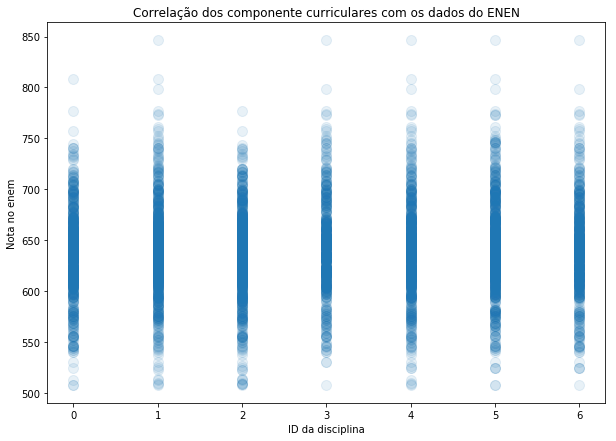

In [134]:
#7
%matplotlib inline

fig2 = plt.figure(figsize=(10,7))

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

Y = dados['enen-nota']
X = dados['disciplina_ID']
plt.scatter(X,Y, alpha=0.1, s=100)
plt.xlabel('ID da disciplina')
plt.ylabel('Nota no enem')
plt.title("Correlação dos componente curriculares com os dados do ENEN")
plt.show()

